In [10]:
import cv2
import sys
import math
import matplotlib.pyplot as plt

In [40]:
image = cv2.imread("./images/DSC00758.jpeg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor = 1.3,
        minNeighbors=5,
        minSize=(30, 30)
)

print("Found {0} Faces!".format(len(faces)))

landmark_detector  = cv2.face.createFacemarkLBF()
landmark_detector.loadModel("lbfmodel.yml")
print(faces)

Found 4 Faces!
[[2636 1961  226  226]
 [1419 1970  200  200]
 [3797 2044  174  174]
 [1728 2871  166  166]]


In [41]:
dim_x, dim_y = image.shape[0], image.shape[1]
# transpose_x, transpose_y = dim_x *0.05, dim_y * 0.05
i = 0
for indx, val in enumerate(faces):
    print(indx)
    (x, y, w, h) = val
    transpose_x, transpose_y = w * 0.75, h * 0.75
    x_img = math.floor(x-transpose_x) if math.floor(x-transpose_x) >= 0 else 0
    y_img = math.floor(y-transpose_y) if math.floor(y-transpose_y) >= 0 else 0
    w_img = math.floor(w+2*transpose_x) if math.floor(w+2*transpose_x) < dim_x-1 else dim_x-1
    h_img = math.floor(h+2*transpose_y) if math.floor(w+2*transpose_y) < dim_y-1 else dim_y-1
    cv2.rectangle(image, (x_img, y_img), (w_img+x_img, h_img+y_img), (0, 255, 0), 2)
    roi_color = image[y_img:h_img+y_img, x_img:w_img+x_img]
#     faces[indx] = [x_img, y_img, w_img, h_img]
#     print("[INFO] Object found. Saving locally.")
#     cv2.imwrite(str(w) + str(h) + '_' + str(i) + '_faces.jpg', roi_color)
    i += 1

something, landmarks = landmark_detector.fit(gray, faces)
print(something)
for landmark in landmarks:
    for indx, val in enumerate(landmark[0]):
        if indx > 30:
            (x,y) = val
            # display landmarks on "image_cropped"
            # with white colour in BGR and thickness 1
            cv2.circle(image, (x, y), 2, (255, 255, 255), -1)
    
# status = cv2.imwrite('faces_detected.jpg', image)
# print("[INFO] Image faces_detected.jpg written to filesystem: ", status)

0
1
2
3
True


Text(0.5, 1.0, 'Image')

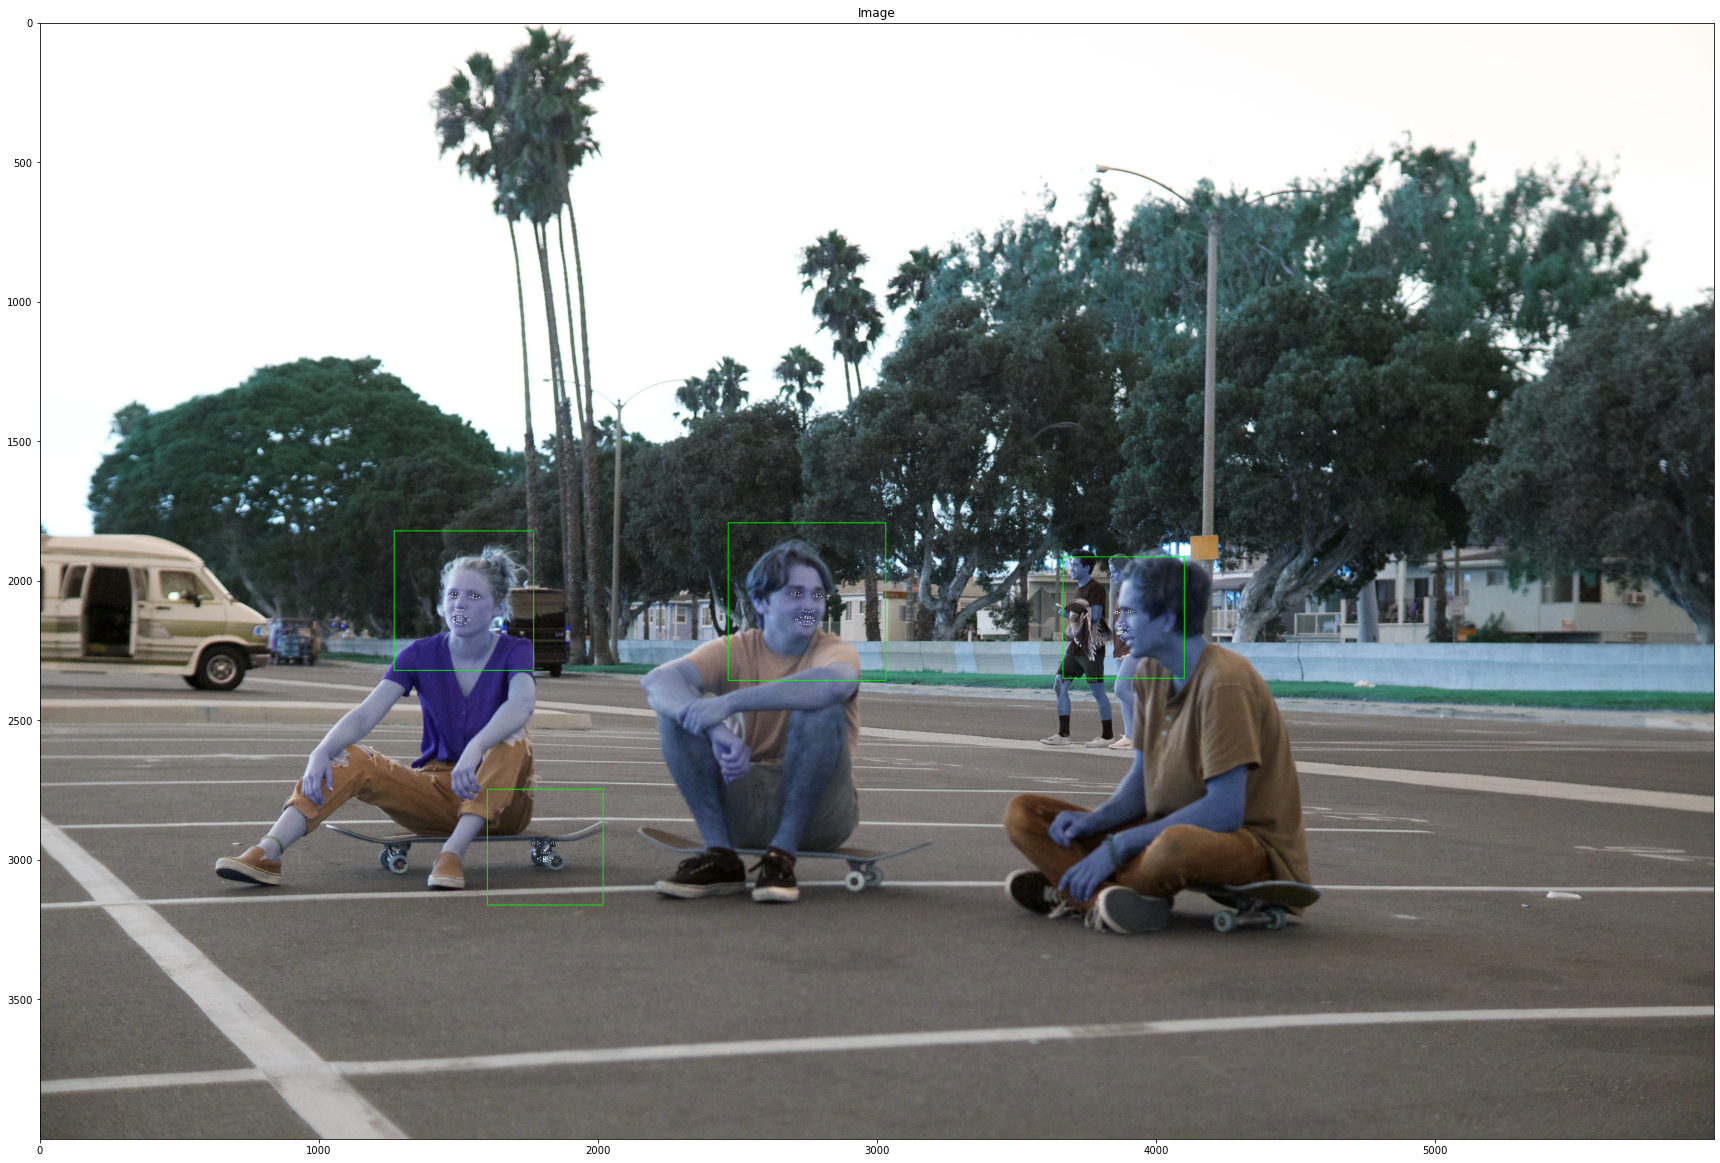

In [42]:
fig, ax1 = plt.subplots(1, figsize = (30, 30))
ax1.imshow(image.astype('uint8'))
# ax1.contour(image, colors='k', levels=[0.5])
ax1.set_title('Image')

# ax2.imshow(image.squeeze(), vmin=0, vmax=1)
# ax2.set_title('Mask')